# Preprocessing and Model Training

This is the third step in the capstone project, the preprocessing of the explored data and then the training of the model.

To reiterate, the main goal of this capstone is to come up with a dietary plan in order to grow the most muscle possible while weight lifting.

The explanatory variables come from a scientific article that studied the rna transcripts of a group undergoing weight lifting.  They were able to isolate the rna transcripts from the group that gained the most muscle growth, and from there, they were able to assign genes to gene clusters that were weighed into the success of the group.  So the explanatory variables are the weights of genes on that contributed to the success of the experimental group.

The response variable will be the slope of the linear regression model made from the explanatory variables and the association factors of the nutrient to the gene (based off of web scrapes and word frequency and classification).

From the generation of slopes, there will be a numeric symbol of how important the nutrient is to maximal muscle growth, and from this plus an FDA guideline will inform an optimal diet plan with regards to nutrients.




The data sources are linked below: 1.) Below is an article containing data on which gene expressions are most significant in highest muscle growth in a population that was resistance training https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8424535/ 2.) Below is the ncbi datasets containing a plethora of genetic information and specifically descriptions on the enzyzmes created by genes: https://www.ncbi.nlm.nih.gov/datasets 3.) Below is a spreadsheet containing all of the sources that were used to scrape information on the different nutrient and vitamins inspected in this: https://docs.google.com/spreadsheets/d/e/2PACX-1vSPbumnC2FG7QbilXNMXzGAeuT9htHy2MNP_qFUBRLxBGheJai-S9E0ecnMUHnjmHlYo7RxXWVPctMI/pubhtml

#1 Create a function that standardizes the data and then fit a linear regression model

In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import PolynomialFeatures

In [5]:
df = pd.read_csv('model_ready.csv')

In [6]:
df = df.drop(columns=['Unnamed: 0'])

In [7]:
df.head()

,membership,traitsig,Vitamin A Factor Product and Sum,Vitamin C Factor Product and Sum,Iron Factor Product and Sum,Vitamin D Factor Product and Sum,Vitamin E Factor Product and Sum,Vitamin K Factor Product and Sum,Thiamin Factor Product and Sum,Riboflavin Factor Product and Sum,...,Copper Factor Product and Sum,Manganese Factor Product and Sum,Molybdenum Factor Product and Sum,Chloride Factor Product and Sum,Potassium Factor Product and Sum,Choline Factor Product and Sum,Magnesium Factor Product and Sum,Phosphate Factor Product and Sum,Calcium Factor Product and Sum,Chromium Factor Product and Sum
0,0.5158,0.2172,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
1,0.5497,0.4713,0.102100,0.063812,0.0,0.0,0.00000,0.000000,0.044391,0.120118,...,0.0,0.235615,0.0,1.0210,1.0210,0.340333,0.30630,0.183551,0.314154,0.392692
2,0.7754,0.5447,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
3,0.7309,0.4325,0.116340,0.072712,0.0,0.0,0.00000,0.000000,0.050583,0.136871,...,0.0,0.268477,0.0,1.1634,1.1634,0.387800,0.34902,0.209151,0.357969,0.447462
4,0.5587,0.4396,0.049915,0.093591,0.0,0.0,0.49915,0.831917,0.477448,0.117447,...,0.0,0.076792,0.0,0.0000,0.0000,0.465873,0.39932,0.583276,0.153585,0.537546


In [8]:
df.shape

(253, 29)

In [9]:
X = df[['membership','traitsig']]
X.shape

(253, 2)

In [10]:
y= df.iloc[:, 2:]
y.shape


(253, 27)

The actual function that will iterate through the different nutrients, producing a linear regression model with a line containing the two different explanatory variables ('membership' and 'traitsig') and the respective nutrient.  The general equation will be y= ax1 +bx2 +c.  For the ranking statistic, the average of a and b will divided by the mean square error, and the absolute value will be taken.  The averaging of the two slopes will capture the degree of correlation of the gene weight and the nutrient factor, and then the mse will capture the accuracy of the model (the smaller the error, the larger the ranking statistic) in order to generate a hierarchy of nutrients that are highly correlative and accurate.

In [11]:
def scale_fit_predict_slope(df):
    
        nutrient_rank = {}
    
        for x in range(27):

            df_new = df.iloc[:,[0,1,x+2]]
        
            df_new = df_new[df_new.iloc[:, 2] != 0]
            
            first_third_quartile = np.percentile(df_new.iloc[:,2],[25, 75])
            IQR = first_third_quartile[1]- first_third_quartile[0]
            IQR_range = IQR*1.5
        
            upper_limit = first_third_quartile[1]+ IQR_range
            lower_limit = first_third_quartile[0]- IQR_range
        
            df_new = df_new[df_new.iloc[:, 2] > lower_limit]
            df_new = df_new[df_new.iloc[:, 2] < upper_limit]
            
            if len(df_new) >= 20:
    
                X = df_new.iloc[:,[0,1]]
                y = df_new.iloc[:, 2]

                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

                scaler = StandardScaler()

                X_train_scaled  = scaler.fit_transform(X_train)

                X_test_scaled = scaler.transform(X_test)

                model = LinearRegression()

                model.fit(X_train_scaled, y_train)

                y_pred = model.predict(X_test_scaled)

                plt.scatter(y_test, y_pred)
                plt.xlabel('actual values')
                plt.ylabel('predicted values')
                plt.title(f'linear regression for {df_new.columns[2]}')
                plt.show()
                
                print (model.coef_)

                r_squared = r2_score(y_test, y_pred)


                mse = mean_squared_error(y_test, y_pred)

                rank_statistic = abs(((model.coef_[0]+model.coef_[1])/2)/mse)
                
                nutrient_rank[df_new.columns[2]] = rank_statistic
            
            elif len(df_new <= 20):
                    print ('no')
                    
        
                    
        return nutrient_rank
        
        

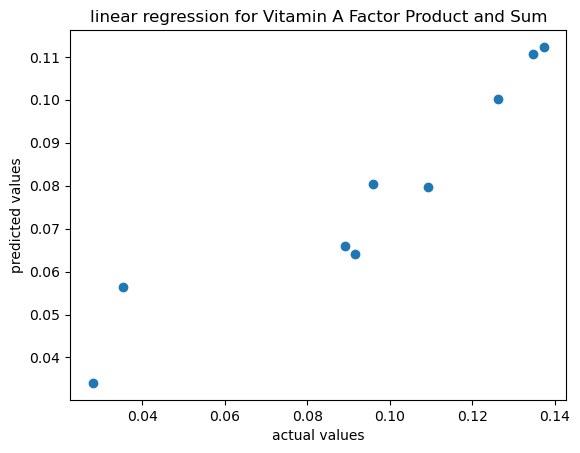

[0.0111244  0.00760225]


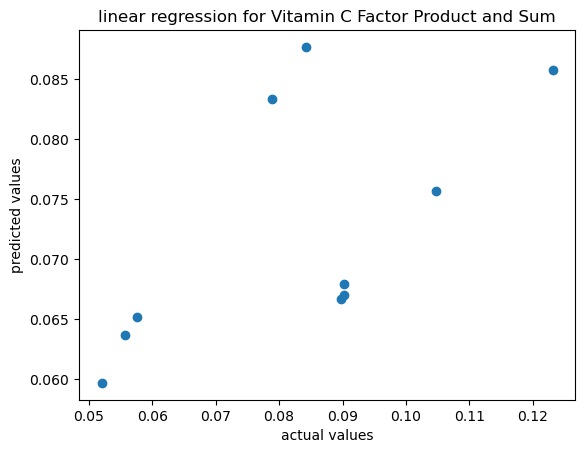

[0.00536584 0.00834586]
no
no


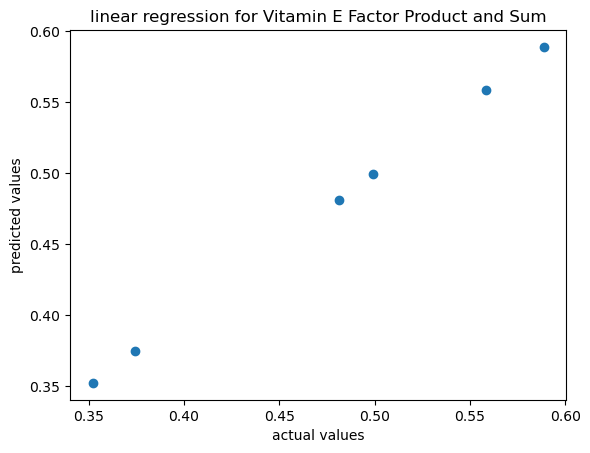

[0.0575411  0.05981101]


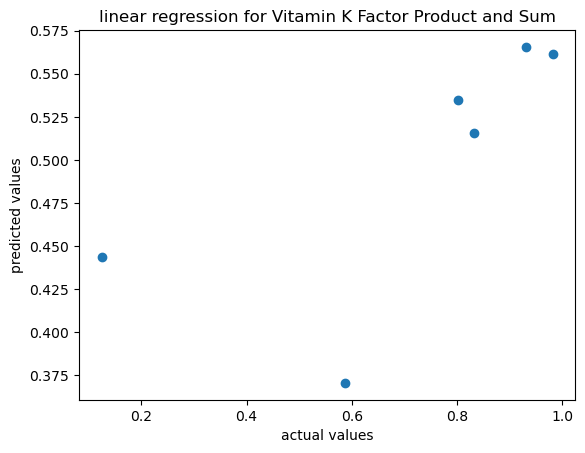

[0.02074731 0.0672601 ]


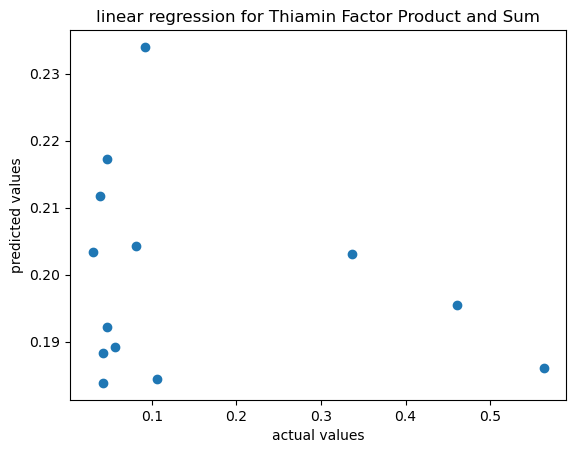

[-0.01547363  0.0078254 ]


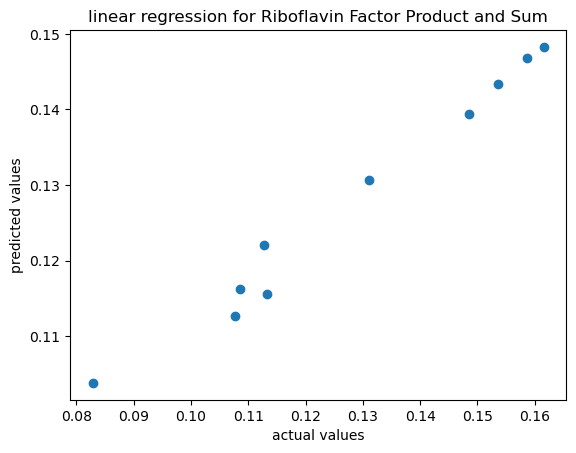

[0.00880627 0.00731788]


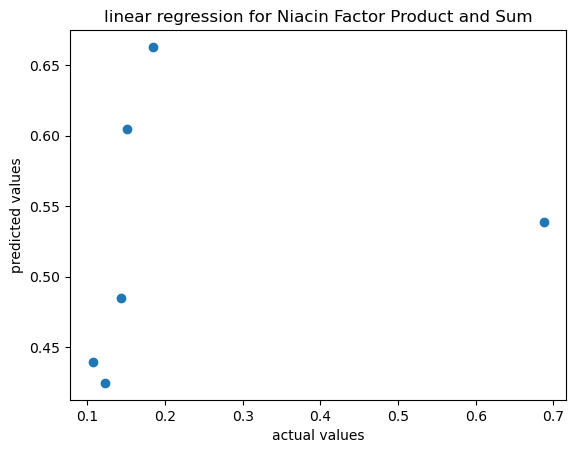

[0.02677521 0.06750481]


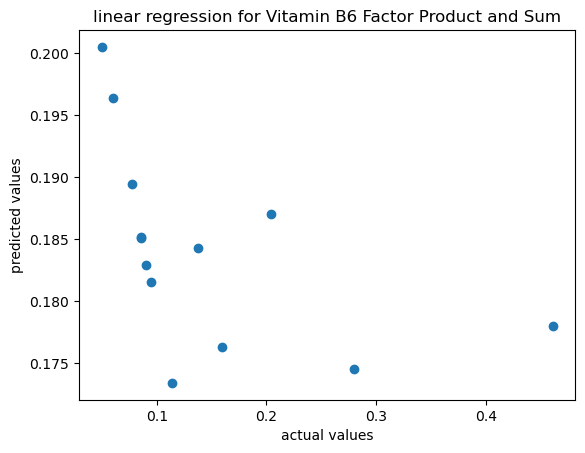

[-0.00450188 -0.00467155]


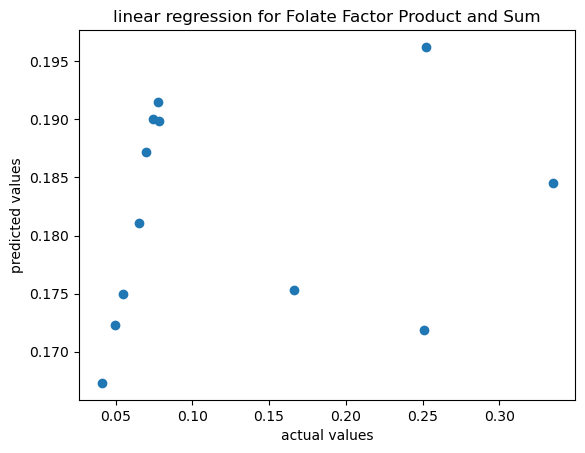

[0.00618275 0.00598092]


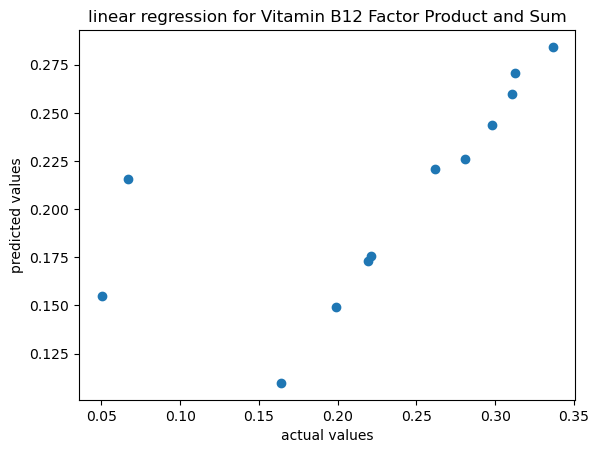

[0.02581256 0.04424477]


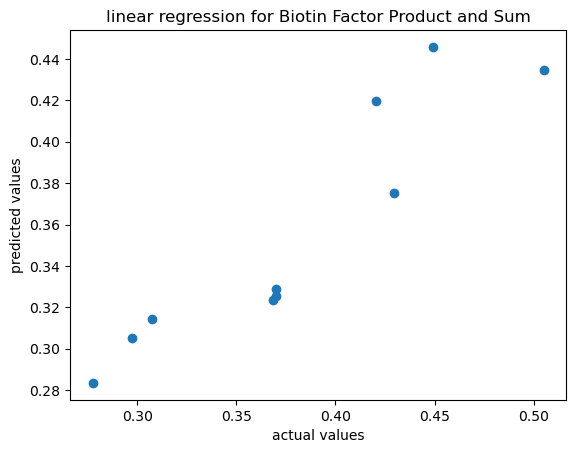

[0.03197307 0.04787023]


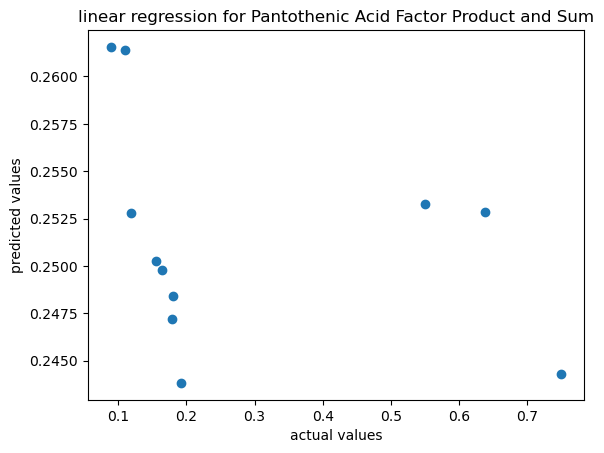

[-0.0062777   0.00010116]
no


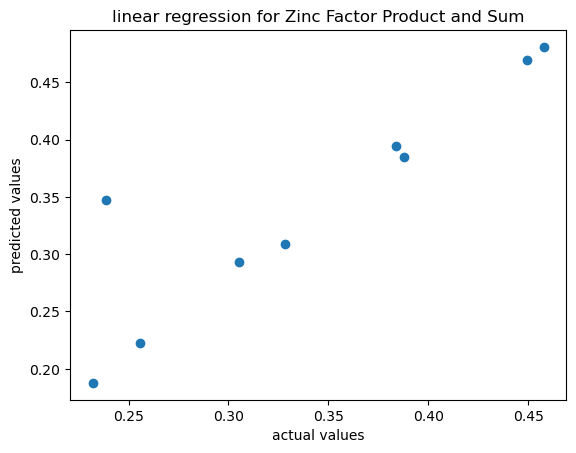

[0.03656719 0.06568379]


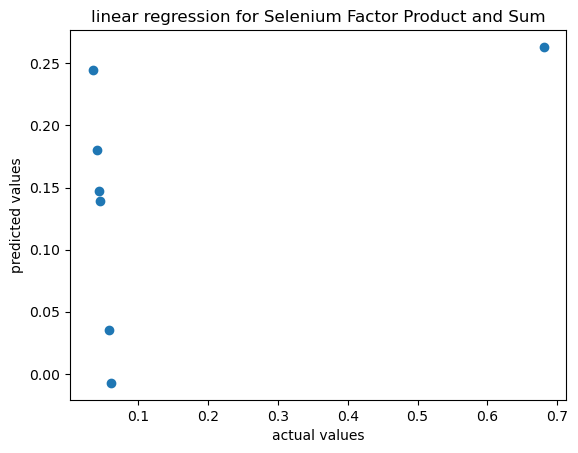

[-0.05078838 -0.05088984]
no


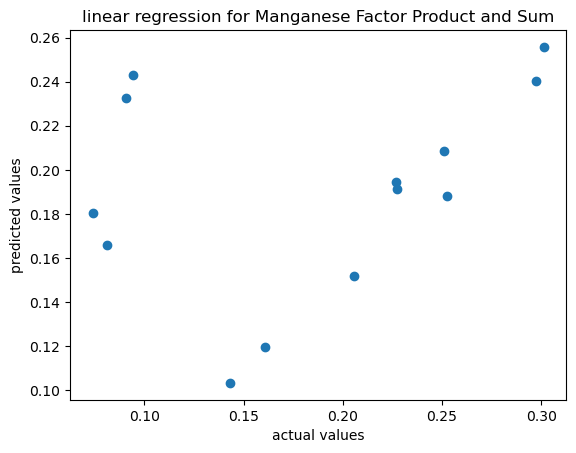

[0.03572266 0.02119024]
no


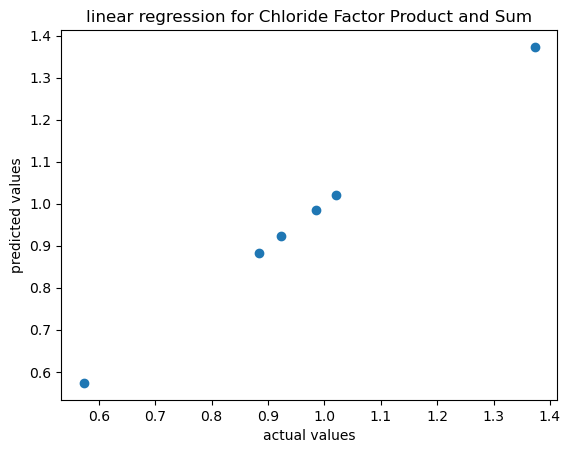

[0.09814852 0.13062839]


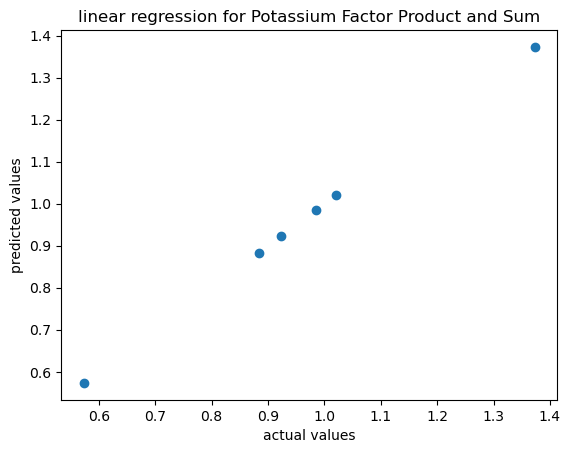

[0.09814852 0.13062839]


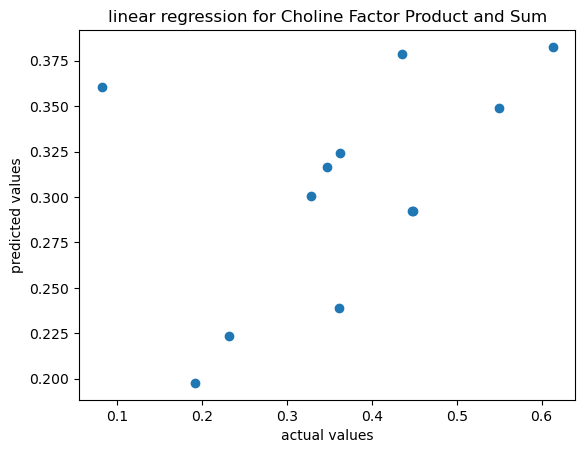

[0.03293261 0.03018027]


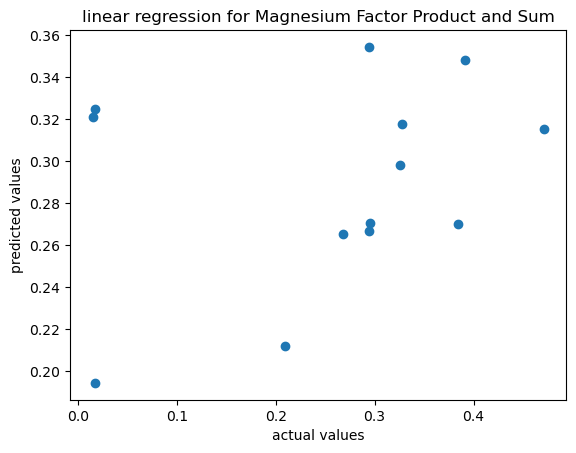

[0.01507238 0.03892469]


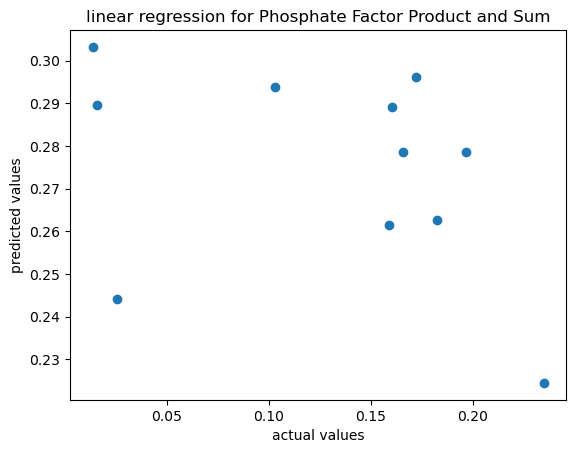

[-0.02981429 -0.00195095]


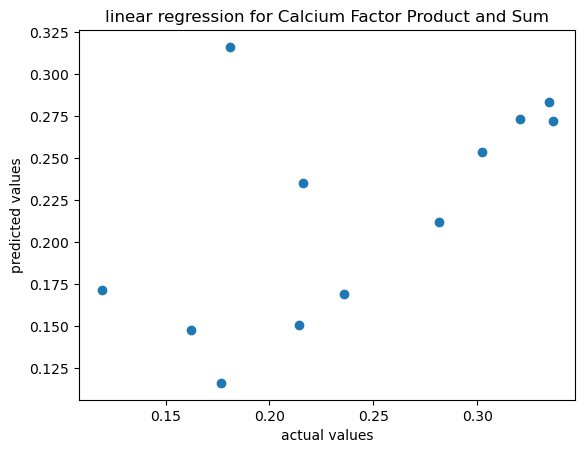

[0.04263697 0.04139909]


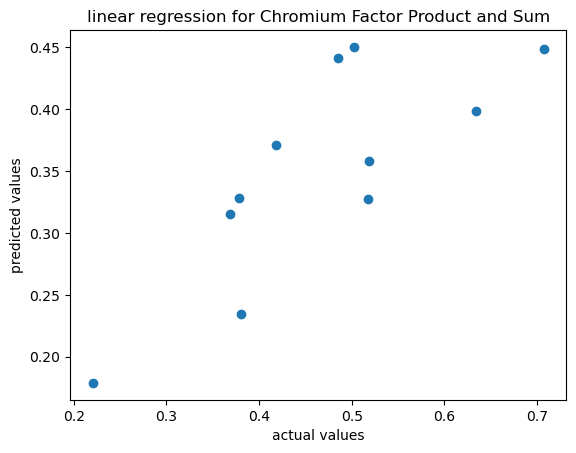

[0.02373266 0.05670182]
{'Vitamin A Factor Product and Sum': 17.639011091857967, 'Vitamin C Factor Product and Sum': 17.073613354631558, 'Vitamin E Factor Product and Sum': 3.808293460683445e+31, 'Vitamin K Factor Product and Sum': 0.419399836452297, 'Thiamin Factor Product and Sum': 0.11302820735887652, 'Riboflavin Factor Product and Sum': 72.22241553538217, 'Niacin Factor Product and Sum': 0.36453736742179116, 'Vitamin B6 Factor Product and Sum': 0.31886276929135243, 'Folate Factor Product and Sum': 0.5089735850597048, 'Vitamin B12 Factor Product and Sum': 7.340417616447126, 'Biotin Factor Product and Sum': 28.9972538247681, 'Pantothenic Acid Factor Product and Sum': 0.05741658075966117, 'Zinc Factor Product and Sum': 28.155832099807686, 'Selenium Factor Product and Sum': 1.3538958595306594, 'Manganese Factor Product and Sum': 4.591569117973693, 'Chloride Factor Product and Sum': 6.186862629100105e+30, 'Potassium Factor Product and Sum': 6.186862629100105e+30, 'Choline Factor Product

In [12]:
results = scale_fit_predict_slope(df)
print (results)

In [13]:
max_value = max(results.values())
print (max_value)

3.808293460683445e+31


The model is reflecting that the chloride, potassium, vitamin E are completely overfitted to the model because their data was not good.  The enzyme classification ratio for these nutrients needs to be redone.  More data in general needs to be wrangled for the nutrients in the construction of their classification ratios.  The data wrangle should be redone with several articles/wikis rather than one.  

Let's drop chloride, potassium, and vitamin E and see what the ranking is.

In [14]:
df_second = df.drop(columns=['Chloride Factor Product and Sum', 'Potassium Factor Product and Sum', 'Vitamin E Factor Product and Sum'])

In [15]:
def scale_fit_predict_slope_iter_2(df):
    
        nutrient_rank = {}
    
        for x in range(24):

            df_new = df.iloc[:,[0,1,x+2]]
        
            df_new = df_new[df_new.iloc[:, 2] != 0]
            
            first_third_quartile = np.percentile(df_new.iloc[:,2],[25, 75])
            IQR = first_third_quartile[1]- first_third_quartile[0]
            IQR_range = IQR*1.5
        
            upper_limit = first_third_quartile[1]+ IQR_range
            lower_limit = first_third_quartile[0]- IQR_range
        
            df_new = df_new[df_new.iloc[:, 2] > lower_limit]
            df_new = df_new[df_new.iloc[:, 2] < upper_limit]
            
            if len(df_new) >= 20:
    
                X = df_new.iloc[:,[0,1]]
                y = df_new.iloc[:, 2]

                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

                scaler = StandardScaler()

                X_train_scaled  = scaler.fit_transform(X_train)

                X_test_scaled = scaler.transform(X_test)

                model = LinearRegression()

                model.fit(X_train_scaled, y_train)

                y_pred = model.predict(X_test_scaled)

                plt.scatter(y_test, y_pred)
                plt.xlabel('actual values')
                plt.ylabel('predicted values')
                plt.title(f'linear regression for {df_new.columns[2]}')
                plt.show()
                
                print (model.coef_)

                r_squared = r2_score(y_test, y_pred)
                
                print (r_squared)

                mse = mean_squared_error(y_test, y_pred)
                
                print(mse)

                rank_statistic = abs(((model.coef_[0]+model.coef_[1])/2)/mse)
                
                nutrient_rank[df_new.columns[2]] = rank_statistic
            
            elif len(df_new <= 20):
                    print ('no')
                    
        
                    
        return nutrient_rank
        

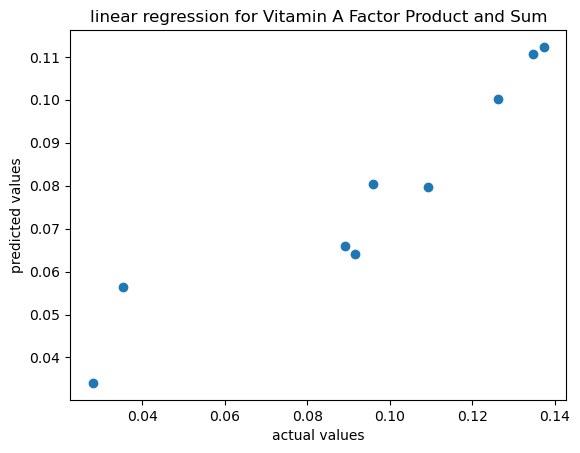

[0.0111244  0.00760225]
0.6222517780064444
0.0005308305220010569


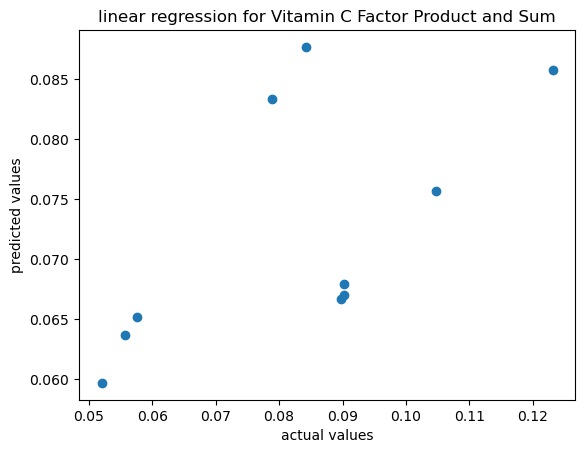

[0.00536584 0.00834586]
0.12556419854596312
0.000401546532556312
no
no


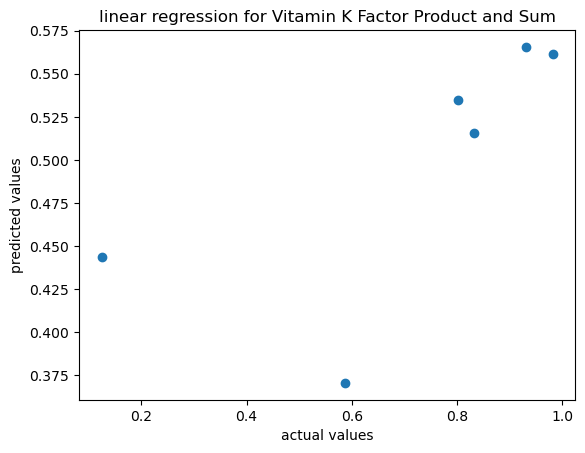

[0.02074731 0.0672601 ]
-0.25094585256578306
0.10492064886572251


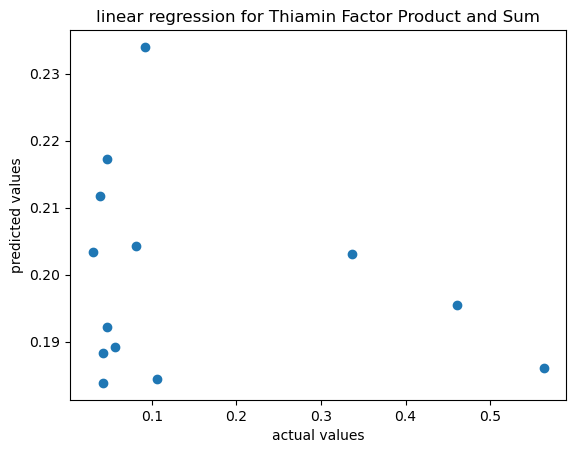

[-0.01547363  0.0078254 ]
-0.12486063273614856
0.03383330171327127


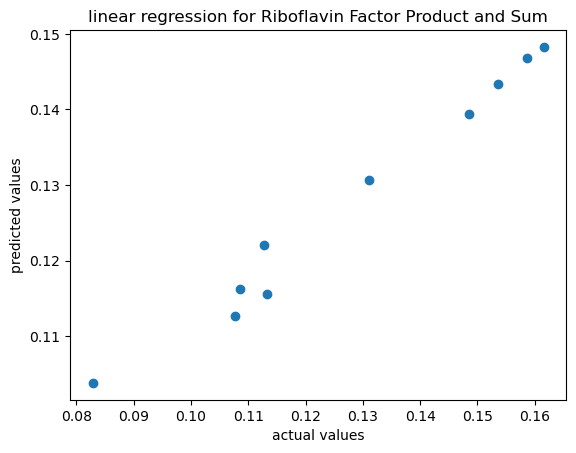

[0.00880627 0.00731788]
0.8261584088027505
0.00011162840433397541


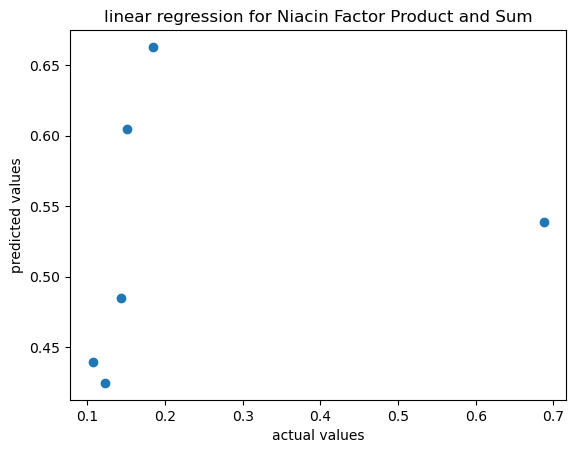

[0.02677521 0.06750481]
-2.0797933473873806
0.12931460660772837


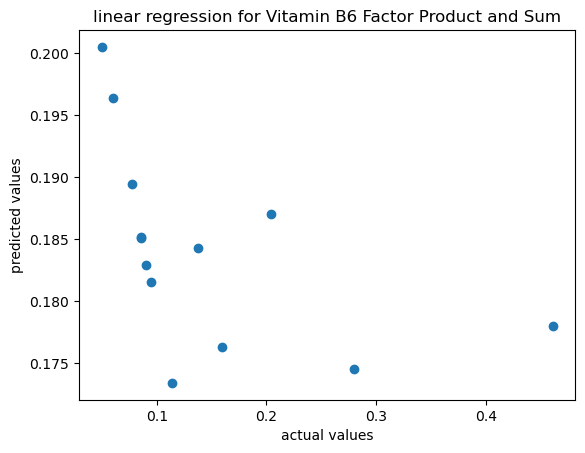

[-0.00450188 -0.00467155]
-0.1990780912995933
0.014384609685922405


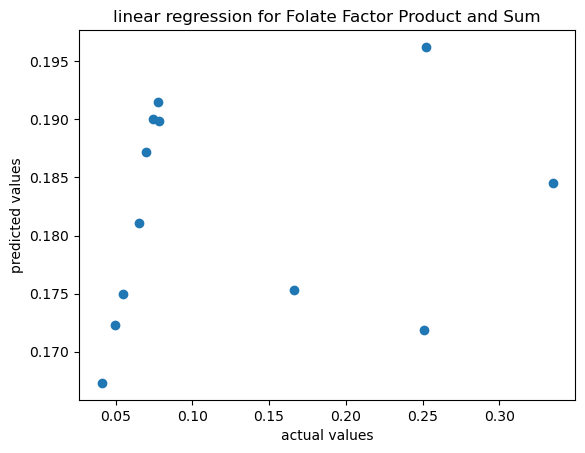

[0.00618275 0.00598092]
-0.31673030360566745
0.011949217446927356


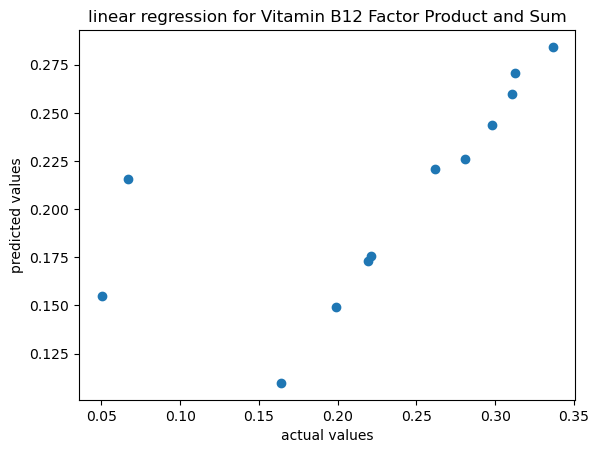

[0.02581256 0.04424477]
0.4099336920472836
0.00477202621995338


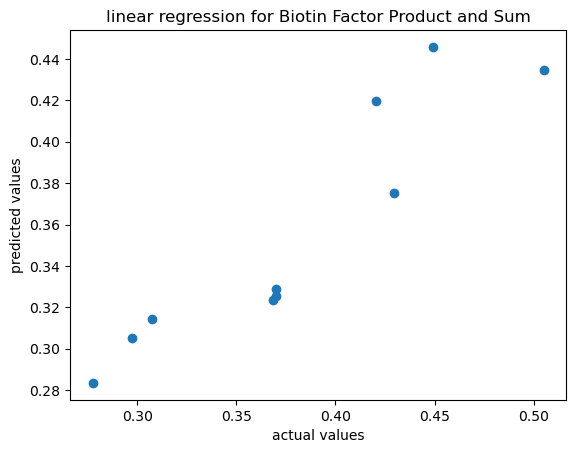

[0.03197307 0.04787023]
0.710060058606765
0.0013767389144475144


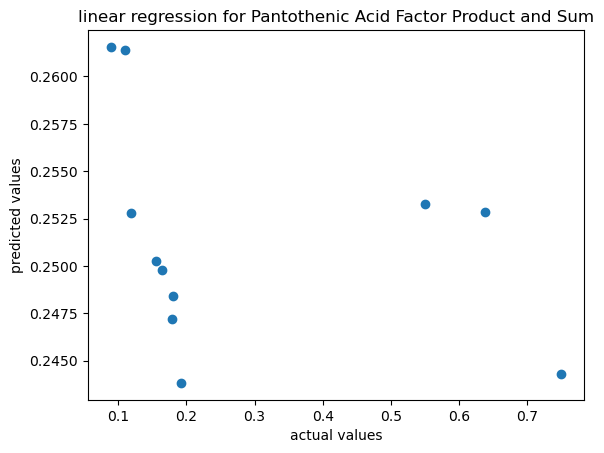

[-0.0062777   0.00010116]
-0.037129997902668466
0.053787151640031935
no


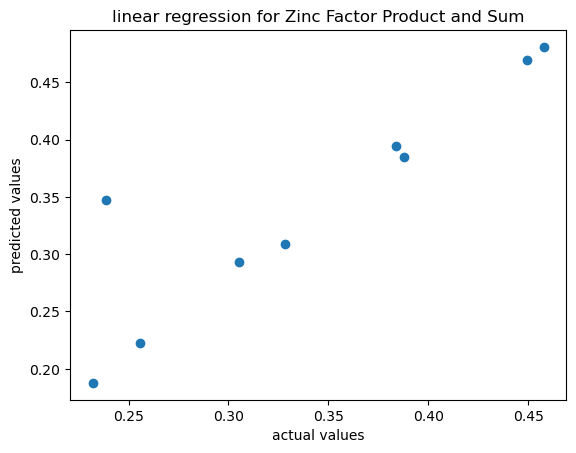

[0.03656719 0.06568379]
0.7291062507812514
0.0018158046656154558


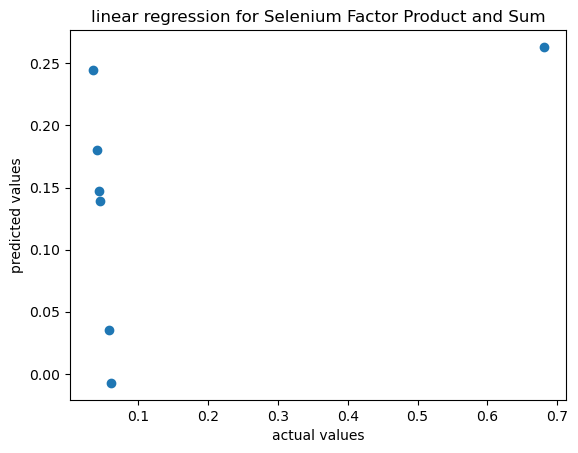

[-0.05078838 -0.05088984]
0.23781189367941236
0.03755023698764453
no


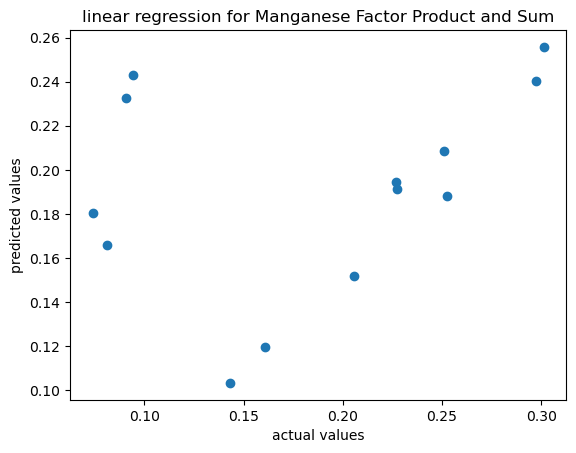

[0.03572266 0.02119024]
0.011864548339494796
0.006197543288668907
no


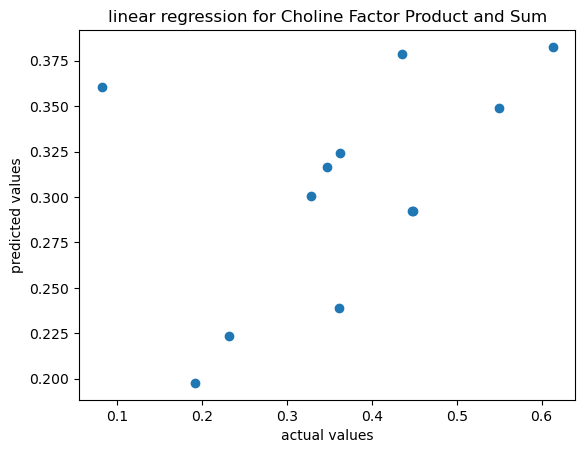

[0.03293261 0.03018027]
0.011778129630121037
0.020099289539855857


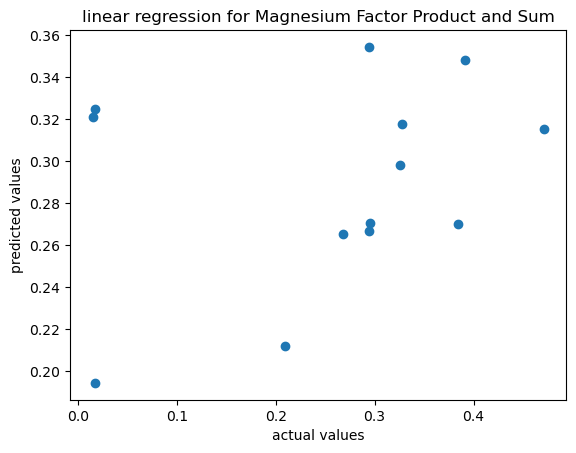

[0.01507238 0.03892469]
0.02004529538877131
0.02034034474572218


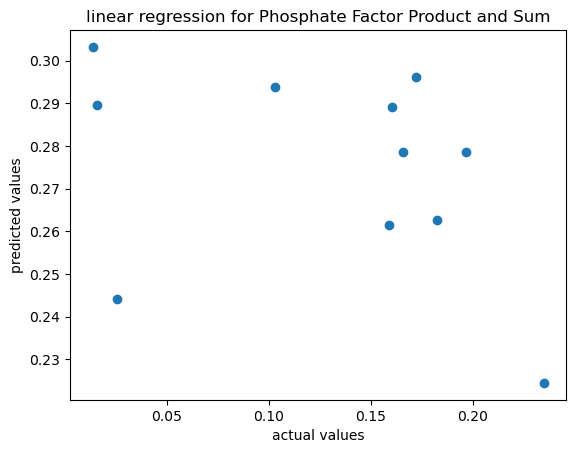

[-0.02981429 -0.00195095]
-4.100259869408762
0.02827456818482538


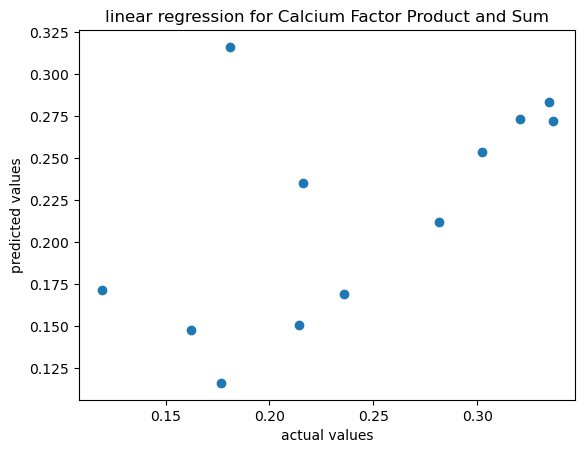

[0.04263697 0.04139909]
0.16575882783341245
0.004149524123023034


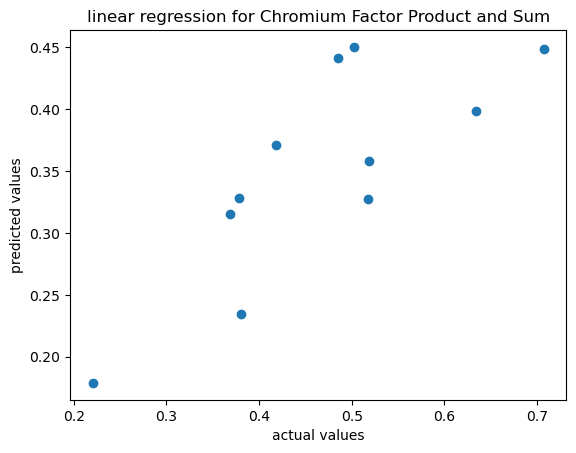

[0.02373266 0.05670182]
-0.21581280231815003
0.019957455959277615
{'Vitamin A Factor Product and Sum': 17.639011091857967, 'Vitamin C Factor Product and Sum': 17.073613354631558, 'Vitamin K Factor Product and Sum': 0.419399836452297, 'Thiamin Factor Product and Sum': 0.11302820735887652, 'Riboflavin Factor Product and Sum': 72.22241553538217, 'Niacin Factor Product and Sum': 0.36453736742179116, 'Vitamin B6 Factor Product and Sum': 0.31886276929135243, 'Folate Factor Product and Sum': 0.5089735850597048, 'Vitamin B12 Factor Product and Sum': 7.340417616447126, 'Biotin Factor Product and Sum': 28.9972538247681, 'Pantothenic Acid Factor Product and Sum': 0.05741658075966117, 'Zinc Factor Product and Sum': 28.155832099807686, 'Selenium Factor Product and Sum': 1.3538958595306594, 'Manganese Factor Product and Sum': 4.591569117973693, 'Choline Factor Product and Sum': 1.570027612673732, 'Magnesium Factor Product and Sum': 1.3273389595670253, 'Phosphate Factor Product and Sum': 0.5617281770

In [16]:
results_2 = scale_fit_predict_slope_iter_2(df_second)
print (results_2)

In [33]:
def lin_reg_CV(df):
    
        nutrient_rank = {}
    
        for x in range(24):

            df_new = df.iloc[:,[0,1,x+2]]
        
            df_new = df_new[df_new.iloc[:, 2] != 0]
            
            first_third_quartile = np.percentile(df_new.iloc[:,2],[25, 75])
            IQR = first_third_quartile[1]- first_third_quartile[0]
            IQR_range = IQR*1.5
        
            upper_limit = first_third_quartile[1]+ IQR_range
            lower_limit = first_third_quartile[0]- IQR_range
        
            df_new = df_new[df_new.iloc[:, 2] > lower_limit]
            df_new = df_new[df_new.iloc[:, 2] < upper_limit]
            
            if len(df_new) >= 20:
    
                X = df_new.iloc[:,[0,1]]
                y = df_new.iloc[:, 2]

                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

                scaler = StandardScaler()

                X_train_scaled  = scaler.fit_transform(X_train)

                X_test_scaled = scaler.transform(X_test)

                model = LinearRegression()
                
                cross = cross_val_score(model, X, y, cv=5, scoring='r2')
                
                #print (cross)
                print (np.mean(cross), np.std(cross))
            
            elif len(df_new <= 20):
                    print ('no')
                    
        
                    
      

In [34]:
cv_results = lin_reg_CV(df_second)
print (cv_results)

0.14319017466327028 0.32623561179426613
0.17005769719290745 0.32352799526205095
no
no
-0.44769602929981744 0.946460910691882
-24.26161152529736 47.77933721781634
0.38159170233988493 0.3851016808313399
-0.3169696147360855 0.27959010635398784
-6.102392373940197 9.179490896882323
-16.551418029922104 31.91898379154589
-0.025807204244780668 0.7442651873949897
0.6896069097432125 0.38343053344830563
-5.284577402923221 10.075293874207155
no
0.30261214333200825 0.6781501154058467
-161.96719214143675 223.49793936969985
no
0.00717736614208031 0.3858325085865111
no
-0.08626201885402247 0.22213291595350396
-0.10637011195240789 0.1162613795628069
-0.8724755601390625 0.9184009861502749
0.17537726320337668 0.3000917062687372
0.24111276517013777 0.5069790108510953
None


This cross validation results are quite abyssmal, maybe ax1 + bx2 is a poor choice for the predictive line, lets use cross validation with just one explanatory variable and see if it performs better.

In [31]:
def lin_reg_CV_membership(df):
    
        nutrient_rank = {}
    
        for x in range(24):

            df_new = df.iloc[:,[0,x+2]]
        
            df_new = df_new[df_new.iloc[:, 1] != 0]
            
            first_third_quartile = np.percentile(df_new.iloc[:,1],[25, 75])
            IQR = first_third_quartile[1]- first_third_quartile[0]
            IQR_range = IQR*1.5
        
            upper_limit = first_third_quartile[1]+ IQR_range
            lower_limit = first_third_quartile[0]- IQR_range
        
            df_new = df_new[df_new.iloc[:, 1] > lower_limit]
            df_new = df_new[df_new.iloc[:, 1] < upper_limit]
            
            if len(df_new) >= 20:
    
                X = df_new.iloc[:, 0]
                X= np.array(X).reshape(-1,1)
                y = df_new.iloc[:, 1]
            
            

                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)
                
                
                scaler = StandardScaler()

                X_train_scaled  = scaler.fit_transform(X_train)

                X_test_scaled = scaler.transform(X_test)

                model = LinearRegression()
                
                cross = cross_val_score(model, X, y, cv=5, scoring='r2')
                
                #print (cross)
                print (np.mean(cross), np.std(cross))
            
            elif len(df_new <= 20):
                    print ('no')

In [32]:
membership_cv_test = lin_reg_CV_membership(df_second)

0.05130176905234814 0.3237673318925648
-0.024979827571958425 0.3228944358367903
no
no
-0.4963120053358866 1.0366425905510537
-22.32160270919456 43.92648056561157
0.2162541585811492 0.3573503621442907
-0.2209195589559823 0.22615253040045516
-5.471460526953857 8.122612798984745
-15.9273672149991 30.835916797290334
-0.26019106091839905 0.7824048209027606
0.37361928062928124 0.45758832768670626
-4.436238252516498 8.457490890912407
no
-0.15361354131322225 0.7706723052592702
-162.5077882245543 229.82530840338242
no
-0.025766437331363835 0.36089706940137095
no
-0.08245295866408683 0.3547512457348893
-0.09184825151198275 0.26239633696313625
-1.0009539484945393 1.0670621449532818
0.007305354419840748 0.3700128437771097
0.08209650413021832 0.4511192327156793


In [35]:
def lin_reg_CV_traitsig(df):
    
        nutrient_rank = {}
    
        for x in range(24):

            df_new = df.iloc[:,[1,x+2]]
        
            df_new = df_new[df_new.iloc[:, 1] != 0]
            
            first_third_quartile = np.percentile(df_new.iloc[:,1],[25, 75])
            IQR = first_third_quartile[1]- first_third_quartile[0]
            IQR_range = IQR*1.5
        
            upper_limit = first_third_quartile[1]+ IQR_range
            lower_limit = first_third_quartile[0]- IQR_range
        
            df_new = df_new[df_new.iloc[:, 1] > lower_limit]
            df_new = df_new[df_new.iloc[:, 1] < upper_limit]
            
            if len(df_new) >= 20:
    
                X = df_new.iloc[:, 0]
                X= np.array(X).reshape(-1,1)
                y = df_new.iloc[:, 1]
            
            

                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)
                
                
                scaler = StandardScaler()

                X_train_scaled  = scaler.fit_transform(X_train)

                X_test_scaled = scaler.transform(X_test)

                model = LinearRegression()
                
                cross = cross_val_score(model, X, y, cv=5, scoring='r2')
                
                #print (cross)
                print (np.mean(cross), np.std(cross))
            
            elif len(df_new <= 20):
                    print ('no')

In [36]:
traitsig_cv_test = lin_reg_CV_traitsig(df_second)

-0.10547966852232755 0.4384127227583687
0.11055764685502718 0.3165791749411851
no
no
-0.3852231183035423 0.8420072563527748
-24.12549162375654 47.51657312301598
0.16633499836394688 0.4355247475538598
-0.3307280160199556 0.30771269680227065
-5.9482431947765875 9.037418709200422
-15.891639999915359 30.853080323451596
-0.05723686599322568 0.5504918548204307
0.5653504760959253 0.34925602385792376
-5.288389051943182 10.095543357525974
no
0.35754197092200424 0.5342011522401126
-91.54544951717251 129.1134366314093
no
-0.09446900149271187 0.2725191921250115
no
-0.10666645054273698 0.14483262947540468
-0.1275766440855516 0.10222338346286423
-0.9855583239826935 1.042393838918467
-0.0317589384357704 0.3523531747434311
0.2182487885594308 0.3749059575810779


The utilization of the single explanatory variables still produced quite abyssmal results.  At this point I am almost convinced that the data structure/amount is bad and needs to be reengineered.  Still I would like to train one more thing in the regression toolbelt: polynomial functions.

This will occur in four functions:
1.) The polynomial will be with both x's
3.) Membership will be alone and polynomial
4.) Traitsig will be alone and polynomial

In [53]:
def poly_both_CV(df, degree):
    
        nutrient_rank = {}
    
        for x in range(24):

            df_new = df.iloc[:,[0, 1,x+2]]
        
            df_new = df_new[df_new.iloc[:, 2] != 0]
            
            first_third_quartile = np.percentile(df_new.iloc[:,2],[25, 75])
            IQR = first_third_quartile[1]- first_third_quartile[0]
            IQR_range = IQR*1.5
        
            upper_limit = first_third_quartile[1]+ IQR_range
            lower_limit = first_third_quartile[0]- IQR_range
        
            df_new = df_new[df_new.iloc[:, 1] > lower_limit]
            df_new = df_new[df_new.iloc[:, 1] < upper_limit]
            
            if len(df_new) >= 20:
                for x in range(1, degree):
                    X = df_new.iloc[:, [0,1]]
                    
                    poly = PolynomialFeatures(degree=x)
                    X_poly = poly.fit_transform(X)
                    
                    y = df_new.iloc[:, 2]



                    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=.25, random_state=23)


                    scaler = StandardScaler()

                    X_train_scaled  = scaler.fit_transform(X_train)

                    X_test_scaled = scaler.transform(X_test)

                    model = LinearRegression()

                    cross = cross_val_score(model, X_poly, y, cv=5, scoring='r2')

                    #print (cross)
                    print (np.mean(cross), np.std(cross), 'degree = ', x)
            
            elif len(df_new <= 20):
                    print ('no')

In [54]:
poly_both_results = poly_both_CV(df_second, 4)

no
no
no
no
-0.4476960292998175 0.9464609106918819 degree =  1
-1.4751906715345178 2.063804216249859 degree =  2
-2.882719223204121 2.818641299407439 degree =  3
-24.26161152529736 47.77933721781634 degree =  1
-25.090971868259164 49.24555237190744 degree =  2
-73.77806244181942 146.19693865937185 degree =  3
no
-0.31696961473608515 0.2795901063539877 degree =  1
-1.2062800491932868 0.8366997411421303 degree =  2
-43.72558405967246 76.58939533761941 degree =  3
-2.4706828479246385 3.0456642055396244 degree =  1
-2.3558015658651206 2.7057210057157084 degree =  2
-3.838209346881503 4.092502987093891 degree =  3
-0.6237512228277898 0.4423819600576661 degree =  1
-0.9945151232492915 0.2724597870483273 degree =  2
-5.95484515284374 7.610789607868434 degree =  3
0.05598100454816566 0.5164148254260248 degree =  1
-0.17270326704509875 0.4720559054426602 degree =  2
-2.1519770648403473 2.3171131667402807 degree =  3
0.5896196506490826 0.2863617597939821 degree =  1
0.39555382416317236 0.4094118

Average R Squared values are very bad with both as polynomials.

In [59]:
def poly_membership_CV(df, degree):
    
        nutrient_rank = {}
    
        for x in range(24):

            df_new = df.iloc[:,[0,x+2]]
        
            df_new = df_new[df_new.iloc[:, 1] != 0]
            
            first_third_quartile = np.percentile(df_new.iloc[:,1],[25, 75])
            IQR = first_third_quartile[1]- first_third_quartile[0]
            IQR_range = IQR*1.5
        
            upper_limit = first_third_quartile[1]+ IQR_range
            lower_limit = first_third_quartile[0]- IQR_range
        
            df_new = df_new[df_new.iloc[:, 1] > lower_limit]
            df_new = df_new[df_new.iloc[:, 1] < upper_limit]
            
            if len(df_new) >= 20:
                for x in range(1, degree):
                    X = df_new.iloc[:, 0]
                    X = np.array(X).reshape(-1,1)
                    poly = PolynomialFeatures(degree=x)
                    X_poly = poly.fit_transform(X)
                    
                    y = df_new.iloc[:, 1]



                    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=.25, random_state=23)


                    scaler = StandardScaler()

                    X_train_scaled  = scaler.fit_transform(X_train)

                    X_test_scaled = scaler.transform(X_test)

                    model = LinearRegression()

                    cross = cross_val_score(model, X_poly, y, cv=5, scoring='r2')

                    #print (cross)
                    print (np.mean(cross), np.std(cross), 'degree = ', x)
            
            elif len(df_new <= 20):
                    print ('no')

In [60]:
poly_mem_results = poly_membership_CV(df_second, 4)

0.051301769052347804 0.3237673318925648 degree =  1
-0.06926861609375964 0.24674719186487098 degree =  2
-0.3899010972868767 0.5232383246183063 degree =  3
-0.02497982757195776 0.3228944358367895 degree =  1
-0.0776252127176521 0.36602045208402456 degree =  2
-0.10249290234125766 0.36504436740719554 degree =  3
no
no
-0.4963120053358872 1.0366425905510541 degree =  1
-0.8622990418843332 0.9512629729507128 degree =  2
-3.977455908300135 3.632814324084207 degree =  3
-22.321602709194572 43.92648056561159 degree =  1
-22.764847526364786 44.57744481028676 degree =  2
-22.096615322002954 43.1213827107077 degree =  3
0.2162541585811487 0.3573503621442912 degree =  1
0.1821031747925414 0.3860733944005868 degree =  2
0.264792348079576 0.2749460734851435 degree =  3
-0.22091955895598225 0.22615253040045505 degree =  1
-0.6983083576024789 0.5353994543732569 degree =  2
-4.410263555279522 6.021251078783856 degree =  3
-5.471460526953855 8.122612798984743 degree =  1
-5.609770272713743 7.982842802

One last try with the traitsig 

In [61]:
def poly_traitsig_CV(df, degree):
    
        nutrient_rank = {}
    
        for x in range(24):

            df_new = df.iloc[:,[1,x+2]]
        
            df_new = df_new[df_new.iloc[:, 1] != 0]
            
            first_third_quartile = np.percentile(df_new.iloc[:,1],[25, 75])
            IQR = first_third_quartile[1]- first_third_quartile[0]
            IQR_range = IQR*1.5
        
            upper_limit = first_third_quartile[1]+ IQR_range
            lower_limit = first_third_quartile[0]- IQR_range
        
            df_new = df_new[df_new.iloc[:, 1] > lower_limit]
            df_new = df_new[df_new.iloc[:, 1] < upper_limit]
            
            if len(df_new) >= 20:
                for x in range(1, degree):
                    X = df_new.iloc[:, 0]
                    X = np.array(X).reshape(-1,1)
                    poly = PolynomialFeatures(degree=x)
                    X_poly = poly.fit_transform(X)
                    
                    y = df_new.iloc[:, 1]



                    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=.25, random_state=23)


                    scaler = StandardScaler()

                    X_train_scaled  = scaler.fit_transform(X_train)

                    X_test_scaled = scaler.transform(X_test)

                    model = LinearRegression()

                    cross = cross_val_score(model, X_poly, y, cv=5, scoring='r2')

                    #print (cross)
                    print (np.mean(cross), np.std(cross), 'degree = ', x)
            
            elif len(df_new <= 20):
                    print ('no')

In [62]:
poly_traitsig_results = poly_traitsig_CV(df_second, 4)

-0.10547966852232778 0.43841272275836896 degree =  1
-0.07707598949296388 0.45904698444431624 degree =  2
-1.1122375769398862 2.23740897676089 degree =  3
0.11055764685502696 0.31657917494118526 degree =  1
0.05691988240263905 0.39906652660745945 degree =  2
0.04623847769148617 0.35669250057230034 degree =  3
no
no
-0.38522311830354194 0.8420072563527742 degree =  1
-1.7795158320414852 3.2273360357715135 degree =  2
-0.05574255643870174 0.705562570733321 degree =  3
-24.12549162375655 47.516573123016 degree =  1
-23.95098746519482 47.21822745203528 degree =  2
-23.718428277851793 46.700781459653335 degree =  3
0.1663349983639476 0.4355247475538591 degree =  1
0.23181612924775857 0.4007609604195739 degree =  2
-0.01633714873853216 0.5909140799458746 degree =  3
-0.3307280160199554 0.30771269680227037 degree =  1
-1.5124591601145343 2.2516507175978746 degree =  2
-0.7537837276634585 1.3682819303679794 degree =  3
-5.9482431947765875 9.03741870920042 degree =  1
-5.925260512711363 9.57356

# From this modelling session there are some key takeaways:

The data is bad, regression is not capturing any trends or behaviors in the data, and most likely the model will be completely unuseful.

The data needs to be re-engineered, potentially, it should be a classification rather than a regression.

One note could be: re engineer scrapes, so the enzyme classifcation ratios are based off of three scrapes rather than one.  This could solve the issues found with vitamin E, Chloride, and potassium, where their highly concentrated enzyme classifcation ratio resulted in extreme over fitting with the ax1 + bx2 regression.

Another note could be: average membership and traitsig into one column, and treat it as a label.  The numbers could represent the average weights, and using pd.cut, you could sort the range into several classifcations (in essence, 1= 'very important' (weights of .8 or higher), 2= 'important' (weights of .6-.8), .....)

This above re engineering would turn the nutrient ratios into the explanatory variables, and the response variable would be the importance or classifcation, which would be the pd.cut of the range of the membership and traitsig weights.

With this new model, we will have clear classifcations of importance of nutrients in maximal muscle growth, and from there, use the FDA guidelines and propose dietary goal numbers for myself and others.

